###  "In The Name Of ALLAH"
# Computational Intelligence Lab Report - Lab 2 - Mr. Amini
## Seyed Mohammadsaleh Mirzatabatabaei(smsmt@aut.ac.ir) - 9623105 
---



## Pre-Report
---


> **1- Perceptron role in neural network:**

*   Perceptron is a single layer neural network. perceptron is a linear classifier (binary). 
*   Also, it is used in supervised learning. It helps to classify the given input data.
*   Single layer perceptrons can learn only linearly separable patterns.
*   Perceptron can implement logic gates like AND, OR, or XOR.


> **2- Simple model of perceptron:**

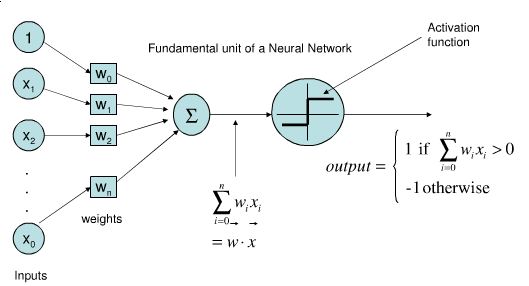

> **3- Perceptron and bio-neuron similarities:** 

While in actual neurons the dendrite receives electrical signals from the axons of other neurons, in the perceptron these electrical signals are represented as numerical values. 
this is also modeled in the perceptron by multiplying each input value by a value called the weight.
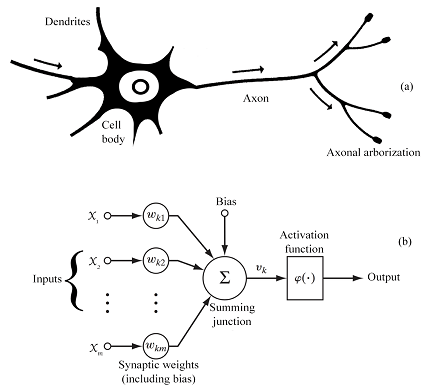


## Report
---

### SLP (single-layer perceptron) class

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class SLP:
  def __init__(self, X, y, lr = 0.01):
    self.x = X
    self.y = y
    self.lr = lr
    self.m, self.n = X.shape
    self.p = y.shape[1]
    self.w = np.zeros((self.p, self.n))
    self.b = np.zeros((self.p, 1))
    self.wrongPredictedNumber = 0

  def predict(self, X):
    y_predict = 1 * ((X.dot(self.w.T) + self.b.T) >= 0)
    e = y - y_predict
    self.wrongPredictedNumber = np.count_nonzero(e)
    return y_predict

  def fit(self, max_iters = 1000):
    snum = 0
    for k in range(max_iters):
      for snum in range(self.m):
        sx = self.x[snum : snum + 1, :].T
        sy = self.y[snum : snum + 1, :].T
        n = self.w.dot(sx) + self.b
        a = n >= 0
        e = sy - a
        self.w = self.w + self.lr * e.T * sx.T
        self.b = self.b + self.lr * e
        if (~np.any(self.y - self.predict(self.x))):
          break;
    return self


### Evaluation of SLP class on the cancer dataset

In [15]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [19]:
X = data.data
y = np.expand_dims(data.target, 1)
slp = SLP(X, y)
print(f"Predicted result:\n{slp.fit(1000).predict(X).T}")
print(f"\nNumber of wrong predicted cases: {slp.wrongPredictedNumber}")

Predicted result:
[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1
  0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1
  0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1
  0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1
  1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1
  1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0
  1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1
  1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1
  1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1
  0 1 1 0 0 0 1 1 0 

## Exercises
---

> **1- Bias value for perceptron:**

Bias is just like an intercept added in a linear equation. it is an additional parameter in the Neural Network which is used to adjust the output along with the weighted sum of the inputs to the neuron. moreover, bias value allows you to shift the activation function to either right or left.

Bias allows you to shift the activation function by adding a constant (i.e. the given bias) to the input. bias in Neural Networks can be thought of as analogous to the role of a constant in a linear function, whereby the line is effectively transposed by the constant value.

The b parameter has implemented in the SLP class and you can see how it can work for the perceptron.

> **2- Performance of single-layer perceptron and its problems:**

The perceptron is a linear classifier, therefore single-layer perceptron it will never get to the state with all the input vectors classified correctly if the training set (like the image below) is not linearly separable, i.e. if the positive examples cannot be separated from the negative examples by a hyperplane. 

In this case, no "approximate" solution will be gradually approached under the standard learning algorithm, but instead, learning will fail completely. hence, if linear separability of the training set is not known a priori, a multi-layer perceptron should be used.

If the training set is linearly separable, then the perceptron is guaranteed to converge, but in the case of the image below, the learning algorithm wouldn't converge because it is a circular disk separable.

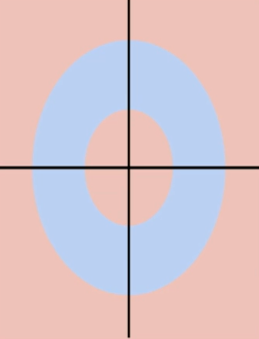









> ### 4- XOR, OR, AND single_layer_perceptron implementation and results :

As the results of the code below, the perceptron learning algorithm has learned the AND, OR correctly, while in the case of XOR due to its linear inseparability, the XOR can not be implemented by the single-layer perceptron network and will never converge.


In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
print(f"X input:\n {X}")

# AND
yand = np.array([[0], [0], [0], [1]])
slp = SLP(X, yand)
slp.fit()
print(f"\nAND predicted result:\n {slp.predict(X)}")

# OR
yor = np.array([0, 1, 1, 1])[:, np.newaxis]
slp = SLP(X, yor)
slp.fit()
print(f"\nOR predicted result:\n {slp.predict(X)}")

# AND, OR together
y = np.concatenate((yand, yor), axis=1)
slp = SLP(X, y)
print(f"\nAND, OR together predicted result:\n {slp.fit().predict(X)}")

# XOR
yxor = np.array([[0], [1], [1], [0]])
slp = SLP(X, yxor)
slp.fit()
print(f"\nXOR predicted result:\n {slp.predict(X)}")

X input:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]

AND predicted result:
 [[0]
 [0]
 [0]
 [1]]

OR predicted result:
 [[0]
 [1]
 [1]
 [1]]

AND, OR together predicted result:
 [[0 0]
 [0 1]
 [0 1]
 [1 1]]

XOR predicted result:
 [[1]
 [1]
 [0]
 [0]]



> ### 5- Data analysis of the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris):



Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris Setosa - Iris Versicolour - Iris Virginica


In [ ]:
import numpy as np
import pandas as pd

# Read and display data
df = pd.read_csv(r'/content/iris.data')
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Using the single-layer perceptron model to classify flowers based on 4 attributes identified and quantified, we consider two separate perceptron neural networks and finally combined the results of the two together to reach the classification result:

*Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2*

In [ ]:
X = df.iloc[:,:4].to_numpy()
di1 = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 1}
df1 = df.replace({"class": di1})
y1 = df1.iloc[:,4].to_numpy()[:, np.newaxis]

slp1 = SLP(X, y1)
slp1.fit()
y_predict1 = slp1.predict(X)

di2 = {"Iris-setosa": 0, "Iris-versicolor": 0, "Iris-virginica": 1}
df2 = df.replace({"class": di2})
y2 = df2.iloc[:,4].to_numpy()[:, np.newaxis]

slp2 = SLP(X, y2)
slp2.fit()
y_predict2 = slp2.predict(X)

y_predict = y_predict1 + y_predict2
print(y_predict.T)   # {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
  2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2]]
